In [1]:
#import Python librarys 
import pandas as pd
import numpy as np

# import Data Visualization librarys
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# import nltk(Natural Language Toolkit) librarys
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from collections import Counter

# import ML librarys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

In [2]:
# importing Data files
df = pd.read_csv("C:/Users/Window/Downloads/Sentiment Analysis/Sentiment Analysis/Dataset/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# dimension of Data
df.shape

(50000, 2)

In [4]:
# check data info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# Data Preprocessing - 

In [5]:
# check the number of missing values in each column
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [7]:
# Function to preprocess text
def data_processing(text):
    text = text.lower()  # Lowercase the text
    
    text = re.sub('<.*?>', '',text) # remove HTML tags
    
    text = text.replace('<br>', '')  # remove <br/ > tags
    
    token_text = word_tokenize(text) # Tokenization
    
    stop_words = set(stopwords.words('english'))     # Load the stopwords for English language

    token_text = [token for token in token_text if token not in stop_words] # filtering of stopwords
    
    token_text = [token for token in token_text if token.isalnum()] # filltering of special Characters
    
    # Stemming
    stemmer = PorterStemmer()
    token_text = [stemmer.stem(token) for token in token_text]
    
    data_processing = ' '.join(token_text)
 # Reconstruct the preprocessed text 
    
    return data_processing

In [8]:
# apply Data_processing function on df
df.review = df['review'].apply(data_processing)

In [9]:
# Check duplicated in this Data
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  424


In [10]:
# remove duplicated from Data
df = df.drop_duplicates('review')

In [11]:
# Dimension of Data
df.shape

(49576, 2)

# Data Visualization-

Text(0.5, 0, 'sentiment')

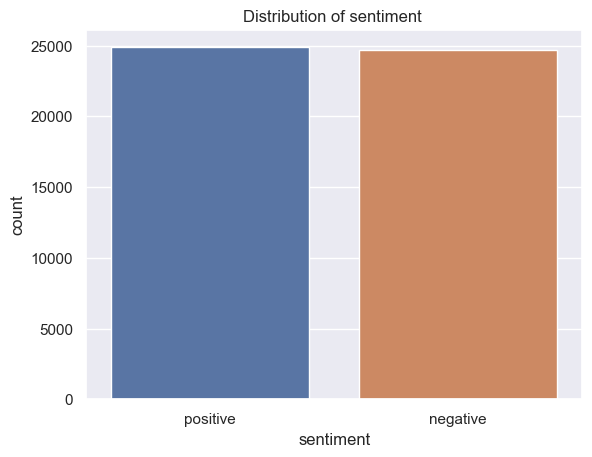

In [12]:
# making a barplot for sentiment column
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of sentiment ')  
plt.xlabel('sentiment') 

Text(0.5, 1.0, 'Distribution of Sentiment')

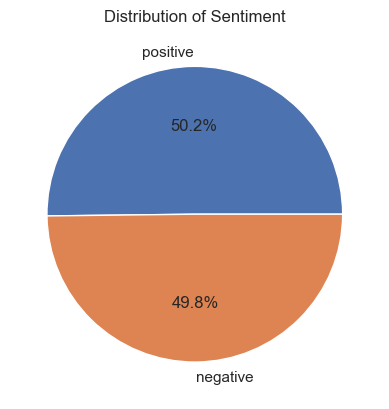

In [13]:
# making a pie chart for Sentiment column
sen_counts = df['sentiment'].value_counts()
plt.pie(sen_counts.values, labels = sen_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sentiment')

In [14]:
# check the count of positive & negative reviews
pos = sen_counts['positive']
neg = sen_counts['negative']

print("Total Positive", pos)
print("Total Negative",neg)

Total Positive 24881
Total Negative 24695


In [15]:
# here we can convert nominal data into numeric data type
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

### Positive:-   1
### Negative:-  0

In [16]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu fashion giv...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [17]:
# Display the most common words for Positive reviews
pos_reviews =  df[df.sentiment == 1]
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
pos_words = pd.DataFrame(count.most_common())
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,49179
1,movi,43262
2,one,27027
3,like,19899
4,time,15537


In [18]:
# Display the most common words for Negative reviews
neg_reviews =  df[df.sentiment == 0]
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
neg_words = pd.DataFrame(count.most_common())
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movi,55775
1,film,42884
2,one,25591
3,like,23754
4,make,15282


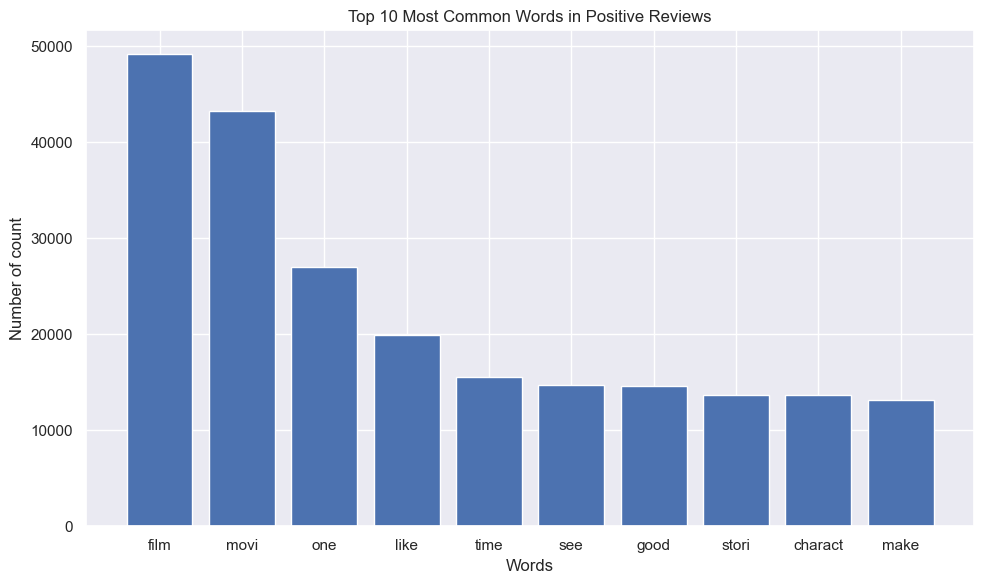

In [19]:
# makeing barplot for Positive reviwes
plt.figure(figsize=(10, 6))
plt.bar(pos_words['word'][:10], pos_words['count'][:10])
plt.xlabel('Words')
plt.ylabel('Number of count')
plt.title('Top 10 Most Common Words in Positive Reviews')
plt.tight_layout()

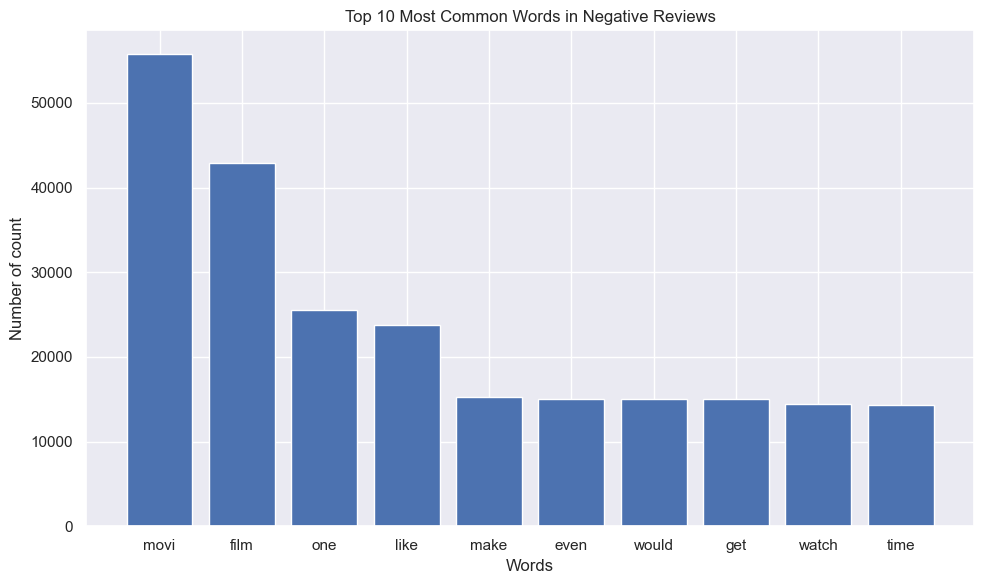

In [20]:
# makeing barplot for Negative reviwes
plt.figure(figsize=(10, 6))
plt.bar(neg_words['word'][:10], neg_words['count'][:10])
plt.xlabel('Words')
plt.ylabel('Number of count')
plt.title('Top 10 Most Common Words in Negative Reviews')
plt.tight_layout()


## split the dataset into training & testing sets-

In [21]:
x = df['review']
y = df['sentiment']

In [22]:
# Creating a train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Vectorization

In [23]:
# Convert text data to numrical features using countVectorizer
vect = CountVectorizer()
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

## Model Training-

In [24]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(x_train_vect , y_train)

LogisticRegression()

In [25]:
# RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train_vect, y_train)

RandomForestClassifier()

In [26]:
# Naive_bayes model
MNB = MultinomialNB()
MNB.fit(x_train_vect, y_train)

MultinomialNB()

##  Model Evaluation-

In [27]:
# check Accuracy score help of Logistic Regreassion
y_predict = LR.predict(x_test_vect)
print('Logistic Regreassion')
print('Accuracy score:',(accuracy_score(y_test, y_predict)*100)) 

# Classifation report
print('\nClassifation Report')
print(classification_report(y_test, y_predict))

Logistic Regreassion
Accuracy score: 87.27223828413905

Classifation Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7360
           1       0.86      0.89      0.88      7513

    accuracy                           0.87     14873
   macro avg       0.87      0.87      0.87     14873
weighted avg       0.87      0.87      0.87     14873



In [28]:
# check Accuracy score help of Random Forest
y_predict = RFC.predict(x_test_vect)
print('Random Forest Classifier')
print('Accuracy score:',(accuracy_score(y_test, y_predict)*100))

# Classifation report
print('\nClassifation Report')
print(classification_report(y_test, y_predict))

Random Forest Classifier
Accuracy score: 84.87191555167082

Classifation Report
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7360
           1       0.84      0.86      0.85      7513

    accuracy                           0.85     14873
   macro avg       0.85      0.85      0.85     14873
weighted avg       0.85      0.85      0.85     14873



In [29]:
# check Accuracy score help of Naive bayes
y_predict = MNB.predict(x_test_vect)
print('Naive bayes model')
print('Accuracy score:',(accuracy_score(y_test, y_predict)*100))

# Classifation report
print('\nClassifation Report')
print(classification_report(y_test, y_predict))

Naive bayes model
Accuracy score: 84.77778524843677

Classifation Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      7360
           1       0.86      0.83      0.85      7513

    accuracy                           0.85     14873
   macro avg       0.85      0.85      0.85     14873
weighted avg       0.85      0.85      0.85     14873

